In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:\ExcelR\DataSets\TATAMOTORS.csv")
data

Date        Open        High         Low       Close   Adj Close  \
0     2012-01-02  179.029724  183.086212  176.902542  181.997894  176.739136   
1     2012-01-03  184.273483  192.732742  184.224014  191.891769  186.347137   
2     2012-01-04  191.792831  200.351028  190.951843  199.064835  193.312943   
3     2012-01-05  198.817490  203.566544  198.075439  199.955276  194.177658   
4     2012-01-06  197.877563  202.824509  196.393478  201.439362  195.618835   
...          ...         ...         ...         ...         ...         ...   
2466  2021-12-27  465.700012  472.450012  460.100006  471.149994  471.149994   
2467  2021-12-28  475.200012  482.799988  472.649994  480.200012  480.200012   
2468  2021-12-29  478.750000  481.600006  474.250000  476.000000  476.000000   
2469  2021-12-30  472.549988  476.399994  468.600006  470.399994  470.399994   
2470  2021-12-31  472.700012  483.600006  471.850006  482.399994  482.399994   

          Volume  
0     10175802.0  
1     15868503.0  
2     22752471.0  
3     21640778.0  
4     13553191.0  
...          ...  
2466  12557565.0  
2467  22860916.0  
2468  10263884.0  
2469  11923961.0  
2470  15541446.0  

[2471 rows x 7 columns]

In [3]:
Tatamotors=data.dropna()

In [4]:
Tatamotors.index=pd.to_datetime(Tatamotors.Date)
Tatamotors=Tatamotors["Close"]['2012-01-01':'2022-01-01']

In [5]:
import plotly.express as px

fig = px.line(Tatamotors)
fig.show()

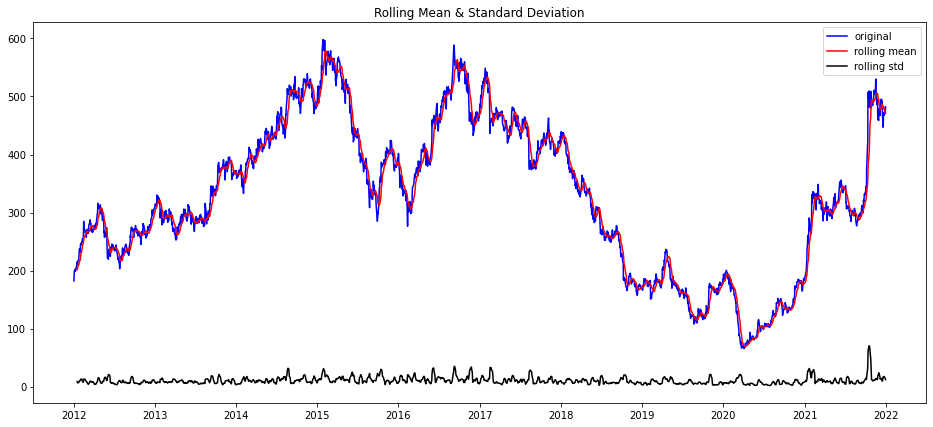

In [6]:
import matplotlib.pyplot as plt
rollmean=Tatamotors.rolling(12).mean()
rollstd=Tatamotors.rolling(12).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

#PLOT ROLLING sTATISTICS:
orig = plt.plot(Tatamotors,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

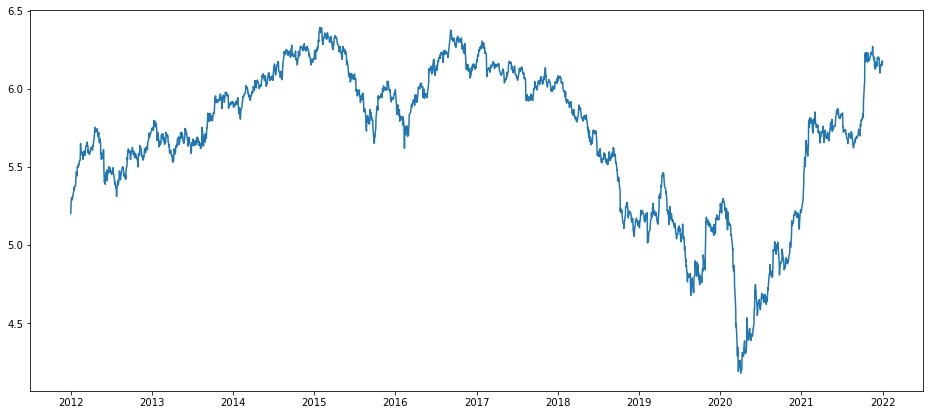

In [7]:
#MAKING SERIES STATIONARY
plt.figure(figsize=(16,7))
fig=plt.figure(1)

#USING LOG TRANSFORM
import numpy as np
ts_log=np.log(Tatamotors)
plt.plot(ts_log)

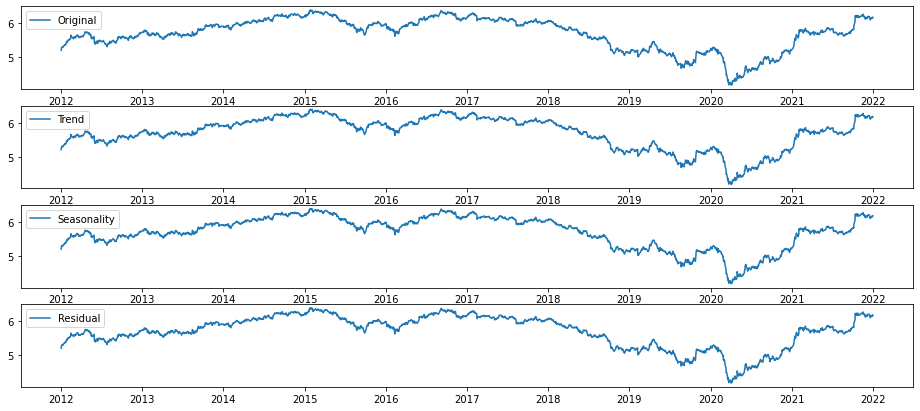

In [8]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_log,period=1,model='multiplicative')

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.subplot(411)
plt.plot(ts_log,label="Original")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(ts_log,label="Trend")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(ts_log,label="Seasonality")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(ts_log,label="Residual")
plt.legend(loc='best')

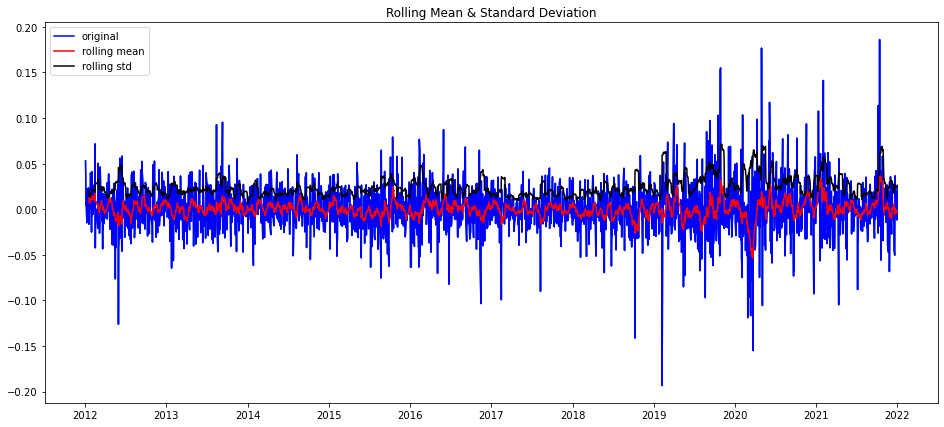

In [9]:
#Lets try Differencing
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

#Determining rolling statistics
rollmean = ts_log_diff.rolling(12).mean()
rollstd = ts_log_diff.rolling(12).std()



#plot rolling statistics
orig = plt.plot(ts_log_diff,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [10]:
Tatamotors.sort_index(inplace=True)

In [11]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



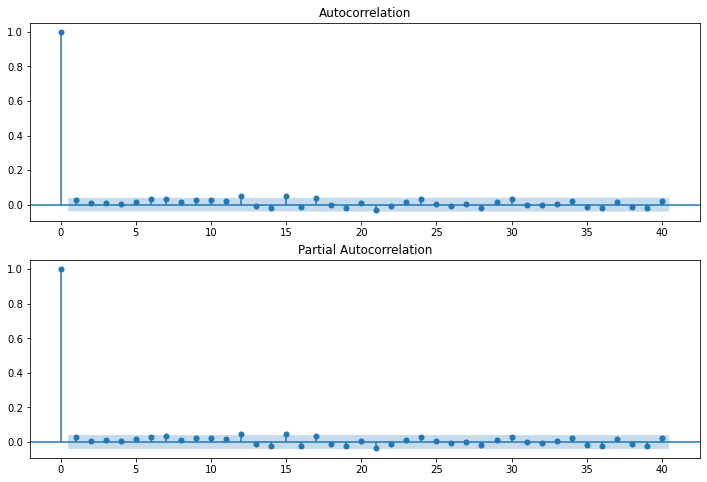

In [12]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

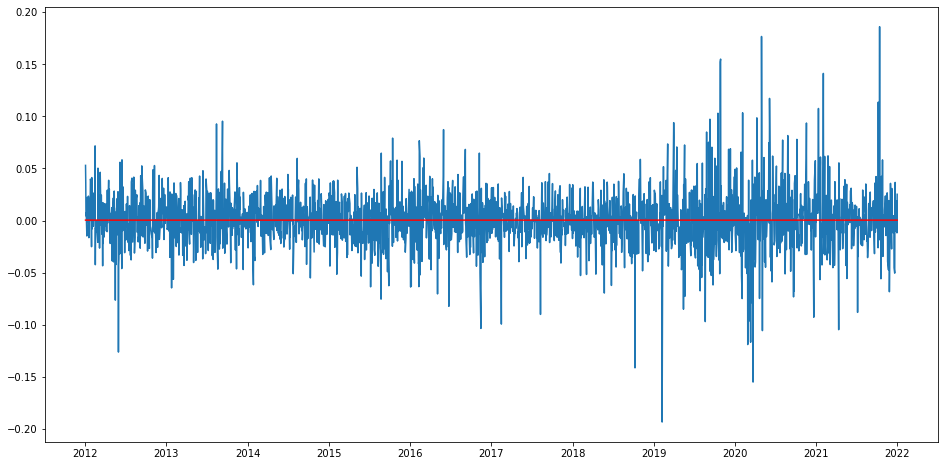

In [13]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [14]:
#Taking fitted values in Series
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(ARIMA_diff_predictions.head())

Date
2012-01-03    0.000396
2012-01-04    0.000396
2012-01-05    0.000396
2012-01-06    0.000396
2012-01-09    0.000396
dtype: float64


In [15]:
#Taking cumulative sum since we have differenced the timeseries
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2012-01-03    0.000396
2012-01-04    0.000791
2012-01-05    0.001187
2012-01-06    0.001582
2012-01-09    0.001978
dtype: float64


In [16]:
# CUMULATIVE ADDITION IS DONE IN ORDER TO COMPENSATE FOR DIFFERENCING
ARIMA_log_prediction=pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2012-01-02    5.203995
2012-01-03    5.204391
2012-01-04    5.204786
2012-01-05    5.205182
2012-01-06    5.205578
dtype: float64

Text(0.5, 1.0, 'RMSE: 179.0089')

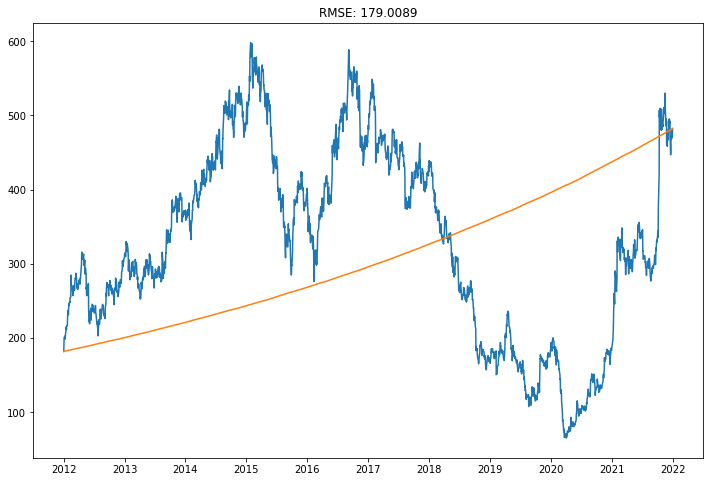

In [17]:
#REVERSE OF LOG IS EXPONENTIAL
plt.figure(figsize=(12,8))
predictions_ARIMA=np.exp(ARIMA_log_prediction)
plt.plot(Tatamotors)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Tatamotors)**2)/len(Tatamotors)))

In [18]:
data=data.dropna()

In [19]:
df1=data.reset_index()['Close']

In [20]:
df1.shape

(2465,)

In [21]:
df1

0       181.997894
1       191.891769
2       199.064835
3       199.955276
4       201.439362
           ...    
2460    471.149994
2461    480.200012
2462    476.000000
2463    470.399994
2464    482.399994
Name: Close, Length: 2465, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1.shape

(2465, 1)

In [24]:
print(df1)

[[0.21901343]
 [0.23758182]
 [0.25104391]
 ...
 [0.77078357]
 [0.76027372]
 [0.78279479]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(1602, 863)

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(1501, 100)
(1501,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(762, 100)
(762,)


(None, None)

In [34]:
print(X_test.shape),(ytest.shape)

(762, 100)


(None, (762,))

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 33s 541ms/step - loss: 0.0814 - val_loss: 0.0210
Epoch 2/100
24/24 [==============================] - 8s 303ms/step - loss: 0.0067 - val_loss: 0.0158
Epoch 3/100
24/24 [==============================] - 6s 243ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 4/100
24/24 [==============================] - 6s 232ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 5/100
24/24 [==============================] - 6s 237ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 6/100
24/24 [==============================] - 5s 227ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 7/100
24/24 [==============================] - 5s 229ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 8/100
24/24 [==============================] - 6s 234ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 9/100
24/24 [==============================] - 5s 226ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 10/100
24/24 [==============================] - 5s 230ms/step - loss: 0.0018 - val_l

In [42]:
import tensorflow as tf

In [43]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 [==============================] - 3s 119ms/step


In [44]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

402.18078071368507

In [46]:
### Test Data RMSE
import math
math.sqrt(mean_squared_error(ytest,test_predict))

237.4317185528652

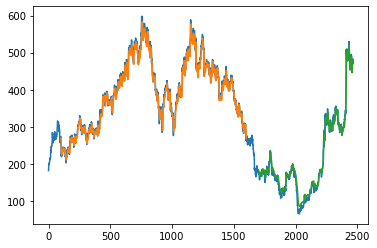

In [47]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

863

In [49]:
x_input=test_data[763:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.45942981 0.48082481 0.47416235 0.49987387 0.49546348 0.49724642
 0.50306438 0.5029705  0.5192983  0.52483475 0.50813158 0.58404637
 0.59615147 0.65770904 0.6672805  0.82877531 0.8113215  0.83384257
 0.78185642 0.79124019 0.83083975 0.79874722 0.7781029  0.83205963
 0.81188451 0.78026116 0.78523461 0.78898812 0.79302313 0.78748668
 0.79649514 0.81845315 0.83393639 0.83600083 0.82230054 0.82905681
 0.82605405 0.85157788 0.87240994 0.83403026 0.78973881 0.8073803
 0.79452452 0.80221923 0.74113085 0.74347679 0.73812803 0.769376
 0.77660152 0.77847828 0.75426814 0.78166873 0.80437748 0.80447136
 0.80540973 0.8070988  0.79593208 0.80015478 0.80071784 0.75989841
 0.71645147 0.72874425 0.76046141 0.76393342 0.75501883 0.76168129
 0.77866596 0.77078357 0.76027372 0.78279479 0.76338881 0.75931776
 0.7520802  0.74494094 0.73814237 0.73163855 0.72536868 0.71925479
 0.71322751 0.70724493 0.70129383 0.69538307 0.68953443 0.68377352
 0.67812419 0.67260504 0.66722703 0.66199541 0.656909

In [61]:
lst_output=scaler.inverse_transform(lst_output)
lst_output

array([[472.05981984],
       [469.89062073],
       [466.03420323],
       [462.23015699],
       [458.60764751],
       [455.14218828],
       [451.80138472],
       [448.54369553],
       [445.33215274],
       [442.14442951],
       [438.97347525],
       [435.8240221 ],
       [432.70766226],
       [429.63805226],
       [426.62789586],
       [423.687102  ],
       [420.82151442],
       [418.03392793],
       [415.32402495],
       [412.68936   ],
       [410.12605843],
       [407.62961041],
       [405.19496619],
       [402.81691723],
       [400.49092193],
       [398.21208935],
       [395.97632252],
       [393.77965152],
       [391.61874162],
       [389.49041686]])

In [62]:
lst_output.shape

(30, 1)

In [52]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
import matplotlib.pyplot as plt

In [54]:
len(df1)

2465

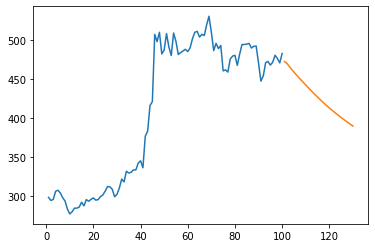

In [55]:
plt.plot(day_new,scaler.inverse_transform(df1[2365:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

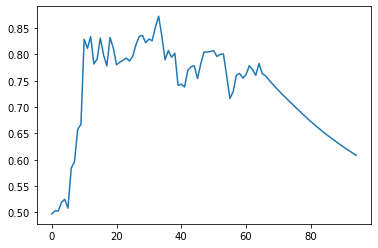

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2400:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

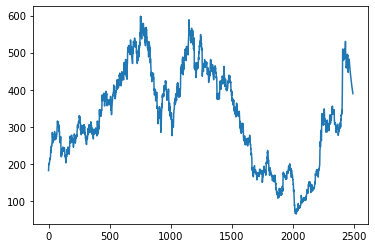

In [58]:
plt.plot(df3)